In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from joblib import Parallel, delayed
from statsmodels.tools.eval_measures import rmse, aic

In [4]:
# Carregue seus dados, defina a data como "ds" e a variável "Open" como "y"
data = pd.read_csv('/content/GE.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,68.009369,68.071815,64.949257,65.386414,64.746658,12801914
1,2021-01-05,65.136612,67.946915,65.074158,67.259956,66.601852,13402511
2,2021-01-06,67.634659,72.568306,67.634659,70.944572,70.250420,21069984
3,2021-01-07,72.193596,72.256050,70.195160,70.382515,69.693871,12055779
4,2021-01-08,70.507416,71.444183,69.695549,70.819672,70.126740,11644242


In [5]:
# Variáveis relevantes
variables = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Função para ajustar um modelo VARMAX com uma ordem específica
def fit_varmax(variables, order):
    model = VARMAX(variables, order=order)
    return model.fit(disp=False)

# Ordem do modelo VARMAX
order = (1, 1)  # Você pode ajustar a ordem conforme necessário


In [8]:


# Use paralelização para ajustar o modelo VARMAX
results = Parallel(n_jobs=-1)(delayed(fit_varmax)(data[variables], order) for _ in range(len(variables)))

# Faça previsões para 60 dias
forecast_steps = 60
forecast_results = [model.forecast(steps=forecast_steps) for model in results]


Previsões para os próximos 60 dias:
           Open        High        Low      Close  Adj Close        Open  \
690  105.798376  108.181727  93.225758  98.260998  92.684863  105.798376   
691   75.097473   72.261845  87.399552  87.855890  82.298474   75.097473   
692   79.686710   78.901977  90.880802  91.317416  89.517864   79.686710   
693   78.907918   78.431278  89.609258  90.675629  89.273481   78.907918   
694   78.881255   78.428902  89.481256  90.559591  89.223202   78.881255   
695   78.864357   78.416032  89.438483  90.525670  89.192007   78.864357   
696   78.861697   78.412614  89.431915  90.518843  89.183537   78.861697   
697   78.861397   78.412000  89.431139  90.517818  89.181835   78.861397   
698   78.861381   78.411893  89.431120  90.517713  89.181546   78.861381   
699   78.861391   78.411882  89.431148  90.517719  89.181514   78.861391   
700   78.861395   78.411883  89.431158  90.517725  89.181514   78.861395   
701   78.861396   78.411883  89.431161  90.517727  8

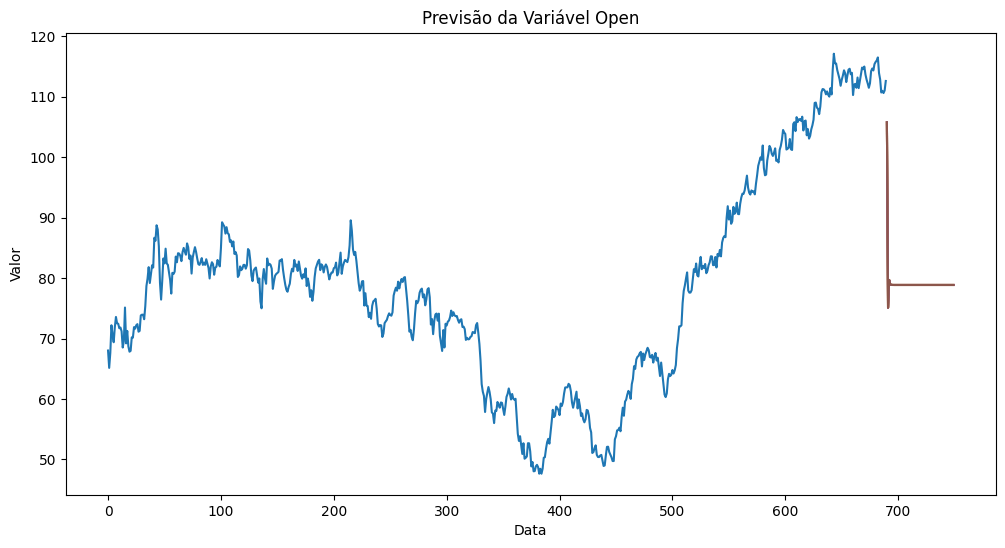

In [10]:


# Crie um DataFrame com as previsões
forecast_df = pd.concat([pd.DataFrame(forecast, columns=variables) for forecast in forecast_results], axis=1)

# Imprima as previsões
print("Previsões para os próximos 60 dias:")
print(forecast_df)

# Variável relevante
variable = 'Open'

# Plote os dados reais e as previsões apenas para 'Open'
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[variable], label=f'Dados Reais - {variable}')
plt.plot(forecast_df.index, forecast_df[variable], label=f'Previsões - {variable}')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title(f'Previsão da Variável {variable}')
plt.show()


In [13]:

# Calcule o AIC e BIC para cada modelo
aic_values = [model.aic for model in results]
bic_values = [model.bic for model in results]

print(f'AIC (Critério de Informação Akaike): {aic_values}')
print(f'BIC (Critério de Informação Bayesiano): {bic_values}')

AIC (Critério de Informação Akaike): [22141.69170338723, 22141.69170338723, 22141.69170338723, 22141.69170338723, 22141.69170338723]
BIC (Critério de Informação Bayesiano): [22459.26011521862, 22459.26011521862, 22459.26011521862, 22459.26011521862, 22459.26011521862]
